1.0 0 0
1.0 1 0
1.0 2 0
1.0 3 0
1.0 4 0
1.0 0 1
1.0 1 1
1.0 2 1
1.0 3 1
1.0 4 1


/home/byu.local/djspenc/.mm_env/lib/python3.7/site-packages/rebound/plotting.py:76: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


1.0 0 2
1.0 1 2
1.0 2 2
1.0 3 2
1.0 4 2
1.0 0 3
1.0 1 3
1.0 2 3
1.0 3 3
0.0 4 3
1.0 0 4
0.0 1 4
1.0 2 4
0.0 3 4
1.0 4 4


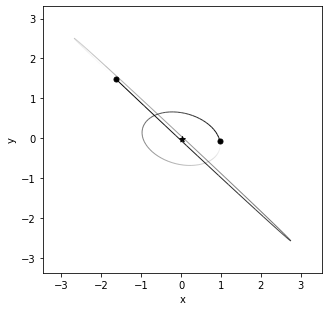

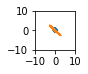

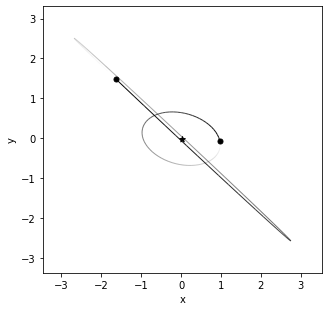

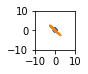

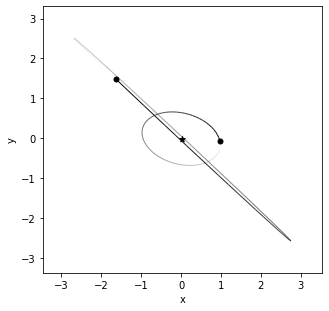

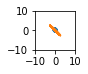

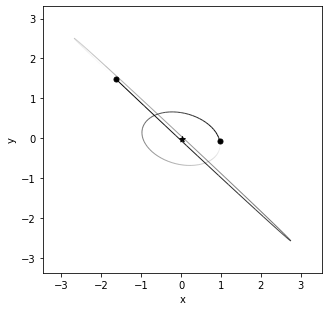

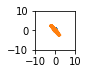

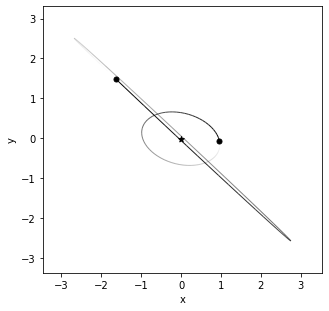

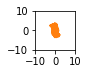

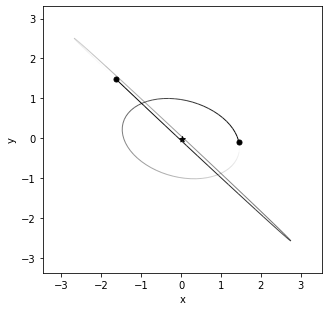

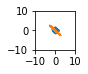

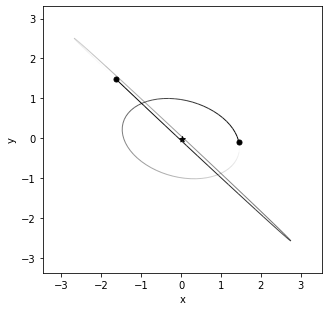

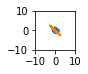

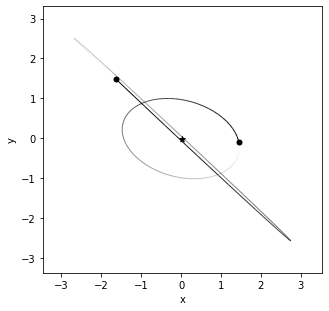

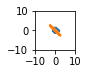

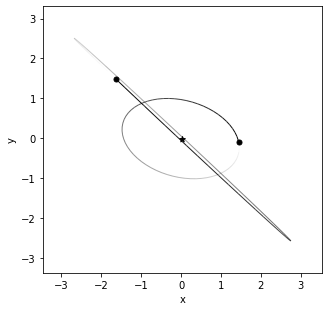

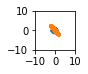

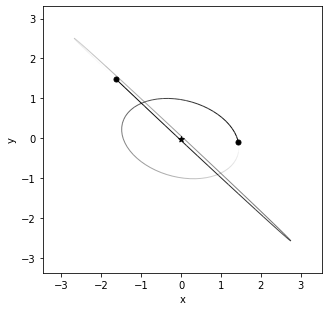

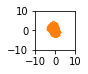

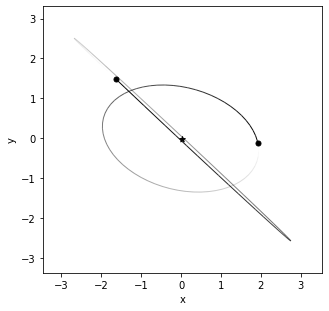

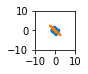

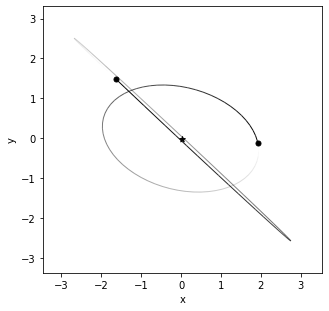

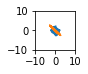

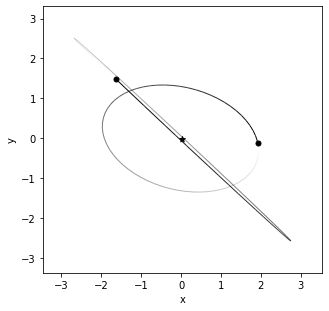

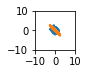

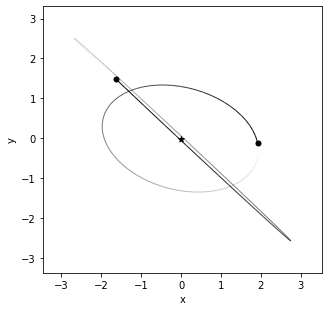

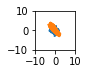

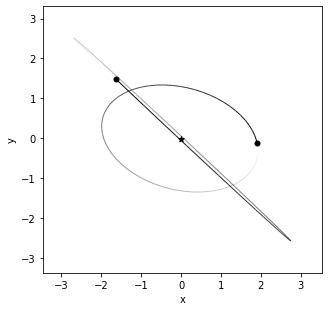

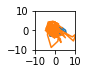

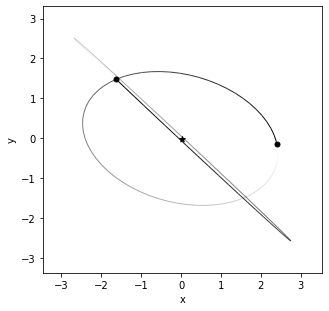

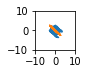

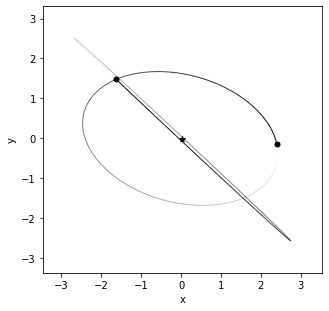

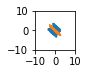

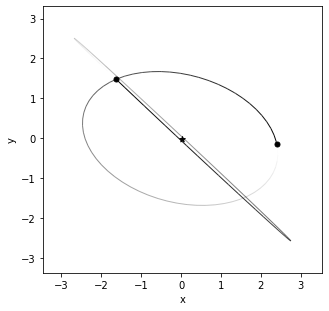

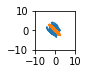

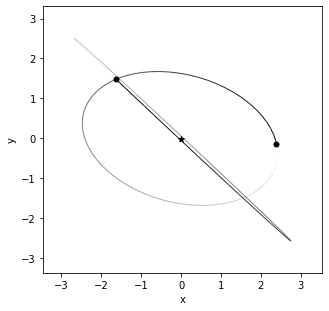

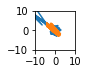

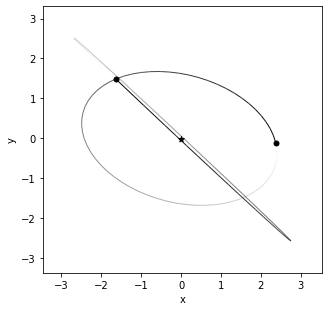

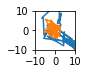

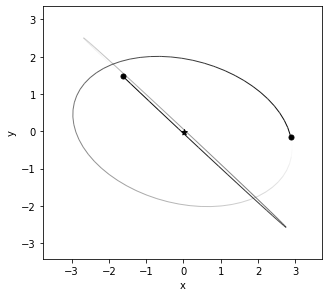

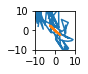

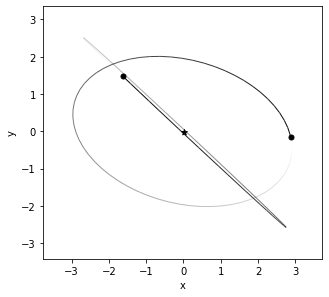

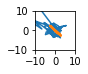

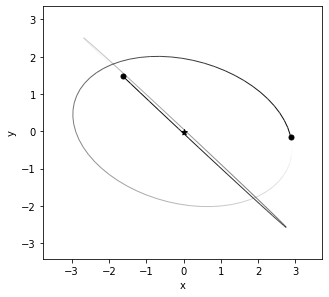

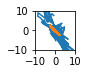

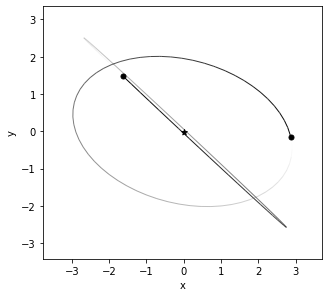

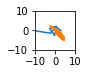

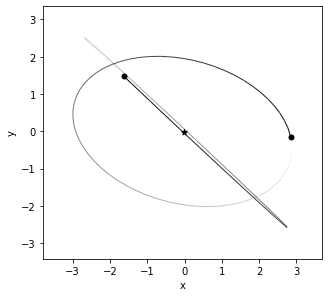

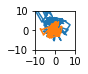

In [7]:
import numpy as np
import rebound
import matplotlib.pyplot as plt

ErisData = [1.6, 0.1163]

run_num = 6
sims = np.zeros((run_num,run_num))
a_array = np.linspace(1.0,3.0,num=run_num, endpoint=True)
m_array = np.geomspace(1.6e-4,1.6e-2,num=run_num, endpoint=True)
for j in range(run_num):
    for k in range(run_num):
        sim = rebound.Simulation()
        sim.add(m=ErisData[0])
        a_num = a_array[j]
        m_num = m_array[k]
        sim.add(m = m_num, r = 0.0100, a = a_num, e = 0.01489, inc = 48, Omega = 50, omega = 131.89, M = 50)
        sim.add(m = 1.6e-2, r = 0.0450, a = 3.7211, e = 0.01, inc = 61.25, Omega = 260, omega = 139, M = 80)

        sim.move_to_com()
#sim.status()
        rebound.OrbitPlot(sim)
        Noutputs = 100

        year = 2.*np.pi # One year in units where G=1
        times = np.linspace(0.,4000.*year, Noutputs)
        x = np.zeros((2,Noutputs))
        y = np.zeros((2,Noutputs))

        sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
        sim.move_to_com()        # We always move to the center of momentum frame before an integration
        ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

        for i,time in enumerate(times):
            sim.integrate(time)
            x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
            y[0][i] = ps[1].y
            x[1][i] = ps[2].x
            y[1][i] = ps[2].y
    
        #fig = plt.figure(figsize=(5,5))
        ax = plt.subplot(run_num+1,run_num+1,j+k+1)
        ax.set_xlim([-10,10])
        ax.set_ylim([-10,10])
#print(x[0],y[0],x[1],y[1])
        plt.plot(x[0], y[0]);
        plt.plot(x[1], y[1]);
        if np.sqrt(x[0][-1]**2+y[0][-1]**2) > 20.0:
            sims[k][j] = False
        elif np.sqrt(x[1][-1]**2+y[1][-1]**2) > 20.0:
            sims[k][j] = False
        else:
            sims[k][j] = True
        print(sims[k][j], k, j)

np.savetxt('sims.txt',sims)

Text(0, 0.5, 'Mass (1.6e_) kg')

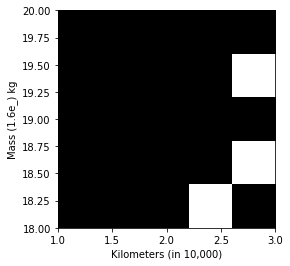

In [9]:
plt.imshow(sims, cmap='binary',extent=[1.0,3.0,18,20])
plt.xlabel('Kilometers (in 10,000)')
plt.ylabel('Mass (1.6e_) kg')